In [1]:
import math
from PIL import Image
from numpy.random import normal, rand
import matplotlib.pyplot as plt
from numpy import linspace

# 1) Функции случайных велечин

#### Распределение Рэлeя $\frac{x}{a^2}*e^{\frac{-x^2}{2*a^2}}$ , а = 3

In [2]:
def Rela(x):
    return (x/3**2) * math.e**(-x**2/(2*3**2))

#### Распределение Лаплпсса $y=\frac{a}{2}e^{-a\left|x-b\right|}$ , a = 3, b = 1

In [3]:
def Laplass(x):
    return 3/2 * math.e**(-3*abs(x-1))

# 2) Rejection sampling

### Алгоритм сэмплирования

In [4]:
def Rejection_sampling(N,f,a,b,c):
    X = []
    Y = []
    False_X = []
    False_Y = []
    while len(X)<N:
        x = rand() * (b-a) + a
        y = rand() * c
        if y < f(x):
            X.append(x)
            Y.append(y)
        else:
            False_X.append(x)
            False_Y.append(y)
    return X,Y,False_X,False_Y

In [5]:
def expepement1(N,f,a,b,c):
    xs = linspace(a, b, N)
    ys = f(xs)

    X,Y,False_X,False_Y = Rejection_sampling(N,f,a,b,c)
    plt.hist(X, 50, density=True,color="green")
    plt.plot(xs, ys,color = "red")
    #plt.fill_between(xs, ys, 0, alpha=0.2)
    plt.scatter(X, Y, s=1,color = "blue")
    plt.scatter(False_X, False_Y, s=1, color = "red")
    plt.xlabel("x"), plt.ylabel("y"), plt.xlim(a,b), plt.ylim(0, c)
    print(f"Эффективность составила {len(X)/(len(X)+len(False_X))*100:0.1f}%")
    plt.show()

### Визуализация работы алгоритма

Эффективность составила 16.2%


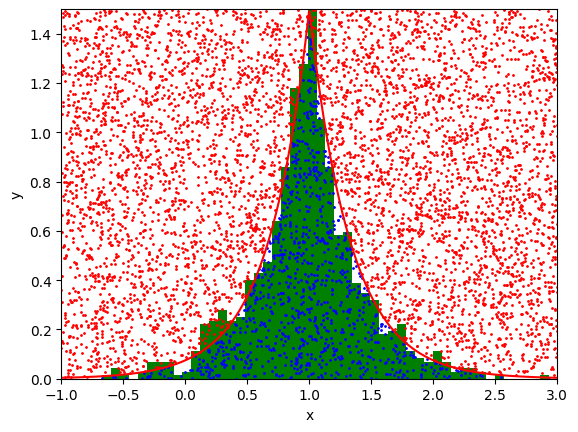

Эффективность составила 39.3%


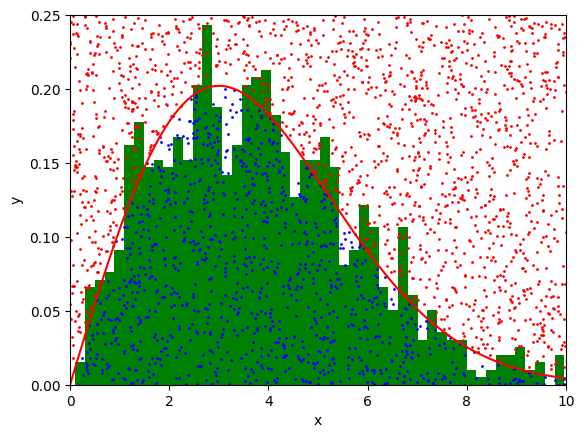

In [6]:
expepement1(1000,Laplass,-1,3,1.5)
expepement1(1000,Rela,0,10,0.25)

# 3) Metropolis hastings

### Алгоритм сэмплирования

In [7]:
def Metropolis_hastings(N,x0,f):
    X = [x0]
    while len(X) < N:
        x_old = X[-1]
        x_new = normal(x_old)
        a = f(x_new)/f(x_old)
        if rand() < a:
            X.append(x_new)
        else:
            X.append(x_old)
    return X

In [8]:
def expepement2(N,f,m,a,b,c):
    X = Metropolis_hastings(N,m,f)
    xs = linspace(a, b, 100)
    ys = f(xs)
    plt.plot(xs, ys,color = "red")
    plt.hist(X, 50, density=True,color="green")
    plt.xlabel("x"), plt.ylabel("y"), plt.xlim(a,b), plt.ylim(0, c)
    plt.grid(True)
    plt.show()

### Визуализация работы алгоритма

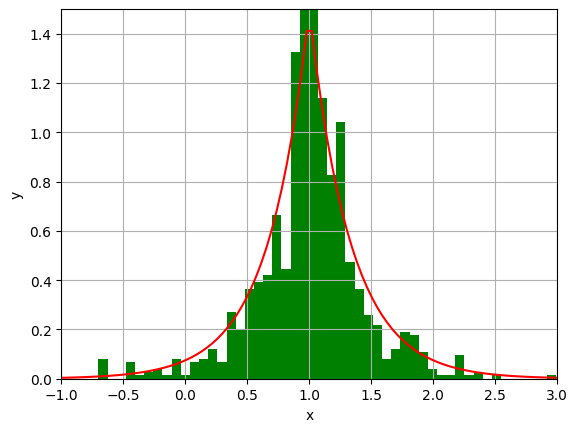

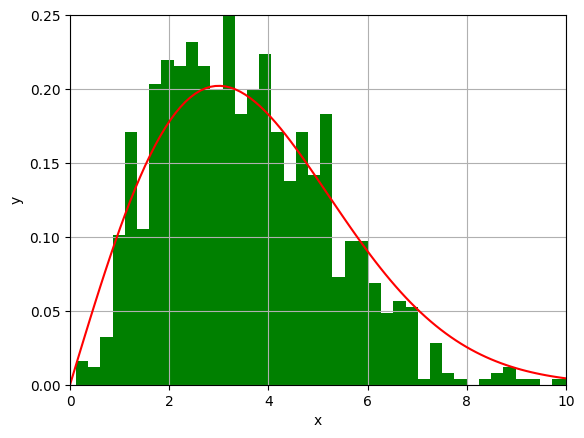

In [9]:
expepement2(1000,Laplass,1,-1,3,1.5)
expepement2(1000,Rela,3,0,10,0.25)